<a href="https://colab.research.google.com/github/Han1018/BeatGAN/blob/DoExpResult/Results/CollectRef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drum in pattern rate

### plot source : https://newaurora.pixnet.net/blog/post/227933636-python-%E4%BD%BF%E7%94%A8matplotlib%E7%95%AB%E6%8A%98%E7%B7%9A%E5%9C%96%28line-chart%29

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/museGan") #更改路徑
dir='/content/drive/MyDrive/museGan'
os.getcwd() #查看當前路徑

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/museGan'

In [ ]:
import numpy as np
import glob2 as gb

In [ ]:
folderPath = './eval_popRock/drum_in_pattern_rate/'
old_FolderPath = './eval_popRock_new/drum_in_pattern_rate/'

allFiles = gb.glob(folderPath+'*.npy')
old_allFiles = gb.glob(old_FolderPath+'*.npy')

baseName = folderPath+'drum_in_pattern_rate_'
old_baseName = old_FolderPath+'drum_in_pattern_rate_'
endName = '.npy'

times = len(old_allFiles) if len(allFiles)>len(old_allFiles) else len(allFiles)
newFiles = []
old_newFiles= []

# 整理排序array
for i in range (times):

  # 找出目標檔案位置
  index = allFiles.index(baseName + str(100*(i+1)) + endName)
  index_old = old_allFiles.index(old_baseName + str(100*(i+1)) + endName)

  newFiles.append(allFiles[index])
  old_newFiles.append(old_allFiles[index_old])

epochValue = []
old_epochValue = []

value_count = 0.0
oldValue_count = 0.0

# 讀取每個epoch的值
for i in range(times) :
  # 取值
  value = np.load(newFiles[i])
  old_value = np.load(old_newFiles[i])
  
  epochValue.append(value)
  old_epochValue.append(old_value)

  # 計算總共的值
  value_count = value_count + value
  oldValue_count = oldValue_count + old_value

new_mean = value_count/times
old_mean = oldValue_count/times
print('舊Model平均值 : ',round(new_mean,2))
print('新Model平均值 : ',round(old_mean,2))
diff = ((new_mean/old_mean)-1)*100
print('Model間差異為 : ',round(diff,2),'%')


舊Model平均值 :  0.95
新Model平均值 :  0.46
Model間差異為 :  107.07 %


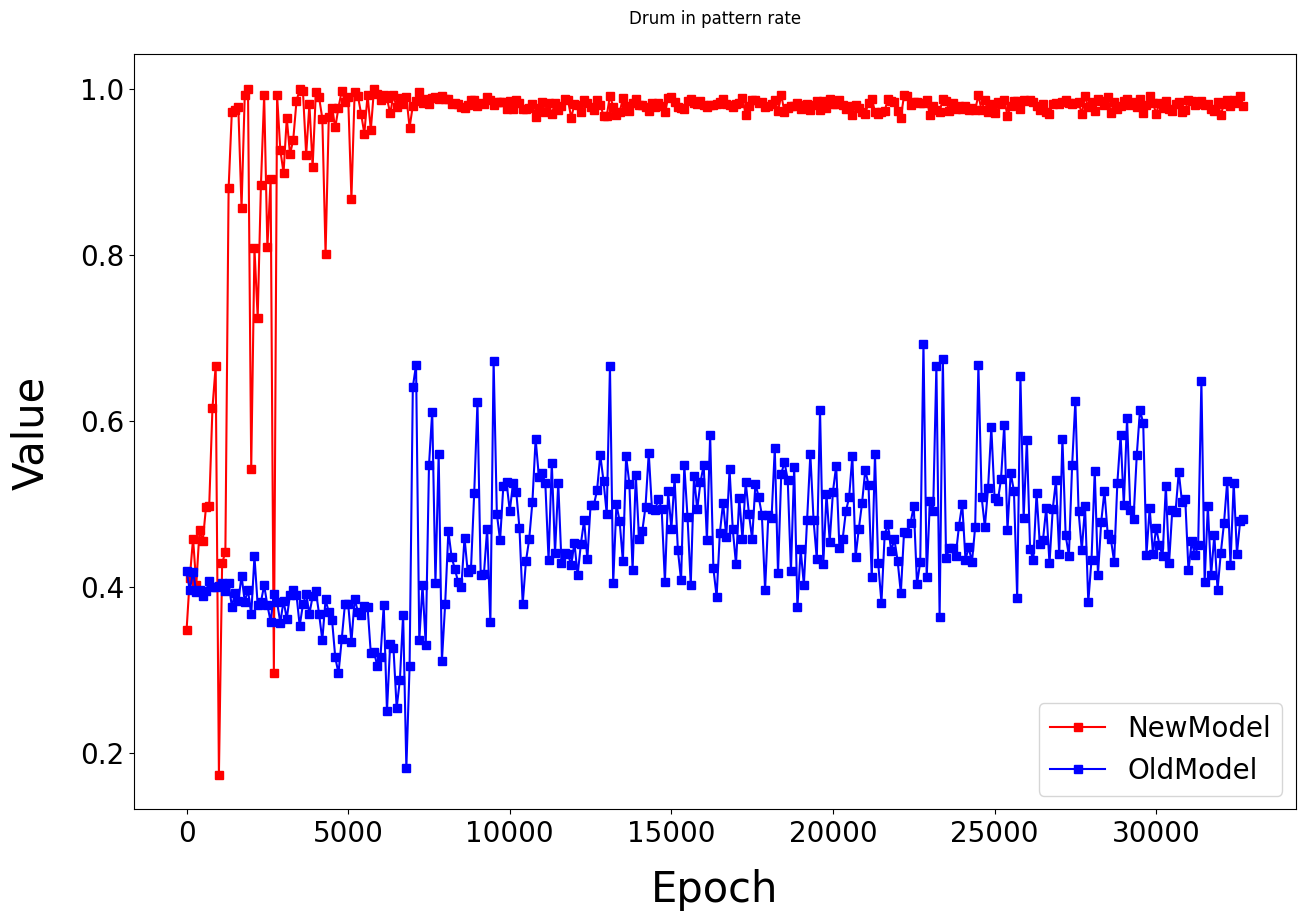

In [ ]:
import matplotlib.pyplot as plt

epoch = [x*100 for x in range(times)]

# 設定圖片大小為長20、寬15
plt.figure(figsize=(15,10),dpi=100,linewidth = 2)

# 把資料放進來並指定對應的X軸、Y軸的資料，用方形做標記(s-)，並指定線條顏色為紅色，使用label標記線條含意
plt.plot(epoch,epochValue,'s-',color = 'r', label="NewModel")
plt.plot(epoch,old_epochValue,'s-',color = 'b', label="OldModel")

# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離
plt.title("Drum in pattern rate", x=0.5, y=1.03)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# 標示x軸(labelpad代表與圖片的距離)
plt.xlabel("Epoch", fontsize=30, labelpad = 15)
# 標示y軸(labelpad代表與圖片的距離)
plt.ylabel("Value", fontsize=30, labelpad = 20)

# 顯示出線條標記位置
plt.legend(loc = "best", fontsize=20)
plt.show()


# Empty Bar Rate

In [ ]:
folderPath = './eval_popRock/empty_bar_rate/'
old_FolderPath = './eval_popRock_new/empty_bar_rate/'

allFiles = gb.glob(folderPath+'*.npy')
old_allFiles = gb.glob(old_FolderPath+'*.npy')
baseName = folderPath+'empty_bar_rate_'
old_baseName = old_FolderPath+'empty_bar_rate_'
endName = '.npy'

times = len(old_allFiles) if len(allFiles)>len(old_allFiles) else len(allFiles)
newFiles = []
old_newFiles= []

# 整理排序array
for i in range (times):

  # 找出目標檔案位置
  index = allFiles.index(baseName + str(100*(i+1)) + endName)
  index_old = old_allFiles.index(old_baseName + str(100*(i+1)) + endName)

  newFiles.append(allFiles[index])
  old_newFiles.append(old_allFiles[index_old])

epochValue_1 = []
epochValue_2 = []
epochValue_3 = []
epochValue_4 = []
epochValue_5 = []

old_epochValue_1 = []
old_epochValue_2 = []
old_epochValue_3 = []
old_epochValue_4 = []
old_epochValue_5 = []

value_count = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
oldValue_count = np.array([0.0, 0.0, 0.0, 0.0, 0.0])

# 讀取每個epoch的值
for i in range(times) :
  value = np.load(newFiles[i])
  old_value = np.load(old_newFiles[i])
  
  epochValue_1.append(value[0])
  epochValue_2.append(value[1])
  epochValue_3.append(value[2])
  epochValue_4.append(value[3])
  epochValue_5.append(value[4])

  old_epochValue_1.append(old_value[0])
  old_epochValue_2.append(old_value[1])
  old_epochValue_3.append(old_value[2])
  old_epochValue_4.append(old_value[3])
  old_epochValue_5.append(old_value[4])

  # 計算總共的值
  value_count = np.add(value_count, value)
  oldValue_count = np.add(oldValue_count, old_value)

new_mean = np.divide(value_count,times)
old_mean = np.divide(oldValue_count,times)
print('舊Model平均值 : ',new_mean)
print('新Model平均值 : ',old_mean)
diff = np.divide(new_mean,old_mean)
persent_diff =np.subtract(np.multiply(diff,100),100)
print('Model間差異為 : ',persent_diff)


舊Model平均值 :  [0.98370808 0.98093321 0.98084985 0.98932927 0.95977039]
新Model平均值 :  [0.94602706 0.90722656 0.87664348 0.95944884 0.87071265]
Model間差異為 :  [ 3.98308072  8.12439287 11.88697188  3.11433288 10.22814312]


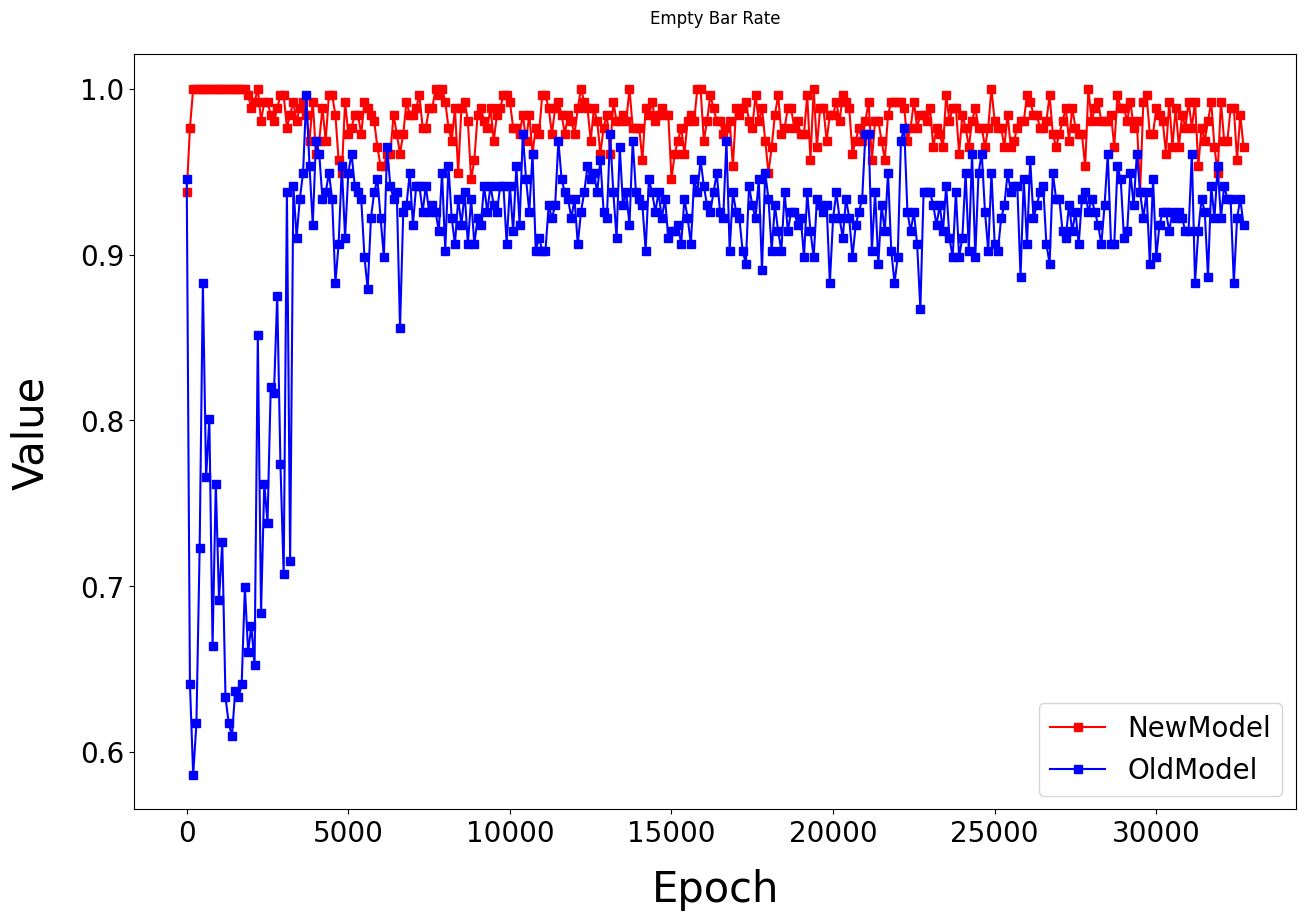

In [ ]:
import matplotlib.pyplot as plt

epoch = [x*100 for x in range(times)]

# 設定圖片大小為長20、寬15
plt.figure(figsize=(15,10),dpi=100,linewidth = 2)

# 把資料放進來並指定對應的X軸、Y軸的資料，用方形做標記(s-)，並指定線條顏色為紅色，使用label標記線條含意
plt.plot(epoch,epochValue_2,'s-',color = 'r', label="NewModel")
plt.plot(epoch,old_epochValue_2,'s-',color = 'b', label="OldModel")

# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離
plt.title("Empty Bar Rate", x=0.5, y=1.03)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# 標示x軸(labelpad代表與圖片的距離)
plt.xlabel("Epoch", fontsize=30, labelpad = 15)
# 標示y軸(labelpad代表與圖片的距離)
plt.ylabel("Value", fontsize=30, labelpad = 20)

# 顯示出線條標記位置
plt.legend(loc = "best", fontsize=20)
plt.show()

# In Scale Ratio


In [ ]:
folderPath = './eval_popRock/in_scale_ratio/'
old_FolderPath = './eval_popRock_new/in_scale_ratio/'

allFiles = gb.glob(folderPath+'*.npy')
old_allFiles = gb.glob(old_FolderPath+'*.npy')
baseName = folderPath+'in_scale_ratio_'
old_baseName = old_FolderPath+'in_scale_ratio_'
endName = '.npy'

times = len(old_allFiles) if len(allFiles)>len(old_allFiles) else len(allFiles)
newFiles = []
old_newFiles= []

# 整理排序array
for i in range (times):

  # 找出目標檔案位置
  index = allFiles.index(baseName + str(100*(i+1)) + endName)
  index_old = old_allFiles.index(old_baseName + str(100*(i+1)) + endName)

  newFiles.append(allFiles[index])
  old_newFiles.append(old_allFiles[index_old])

epochValue_1 = []
epochValue_2 = []
epochValue_3 = []
epochValue_4 = []
epochValue_5 = []

old_epochValue_1 = []
old_epochValue_2 = []
old_epochValue_3 = []
old_epochValue_4 = []
old_epochValue_5 = []

value_count = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
oldValue_count = np.array([0.0, 0.0, 0.0, 0.0, 0.0])

# 讀取每個epoch的值
for i in range(times) :
  value = np.load(newFiles[i])
  old_value = np.load(old_newFiles[i])
  epochValue_1.append(value[0])
  epochValue_2.append(value[1])
  epochValue_3.append(value[2])
  epochValue_4.append(value[3])
  epochValue_5.append(value[4])

  old_epochValue_1.append(old_value[0])
  old_epochValue_2.append(old_value[1])
  old_epochValue_3.append(old_value[2])
  old_epochValue_4.append(old_value[3])
  old_epochValue_5.append(old_value[4])

  # 計算總共的值
  value_count = np.add(value_count, value)
  oldValue_count = np.add(oldValue_count, old_value)

new_mean = np.divide(value_count,times)
old_mean = np.divide(oldValue_count,times)
print('舊Model平均值 : ',new_mean)
print('新Model平均值 : ',old_mean)
diff = np.divide(new_mean,old_mean)
persent_diff =np.subtract(np.multiply(diff,100),100)
print('Model間差異為 : ',persent_diff)


舊Model平均值 :  [0.62922586 0.72149582 0.72349234 0.46364262 0.73419284]
新Model平均值 :  [0.54904285 0.59922453 0.65100625 0.50917338 0.64439734]
Model間差異為 :  [14.60414303 20.40492111 11.13446902 -8.94209254 13.93480329]


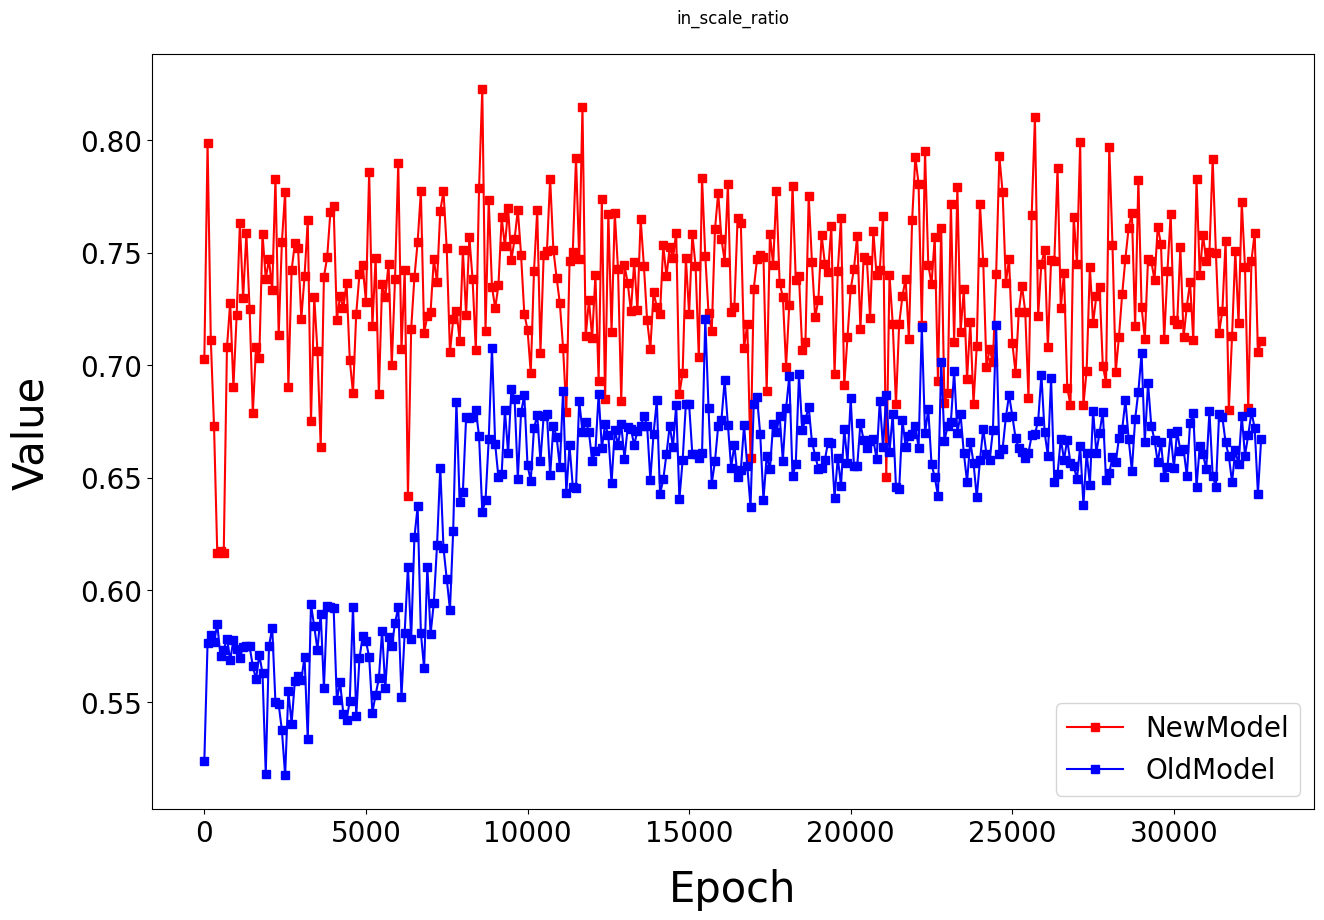

In [ ]:
import matplotlib.pyplot as plt

epoch = [x*100 for x in range(times)]

# 設定圖片大小為長20、寬15
plt.figure(figsize=(15,10),dpi=100,linewidth = 2)

# 把資料放進來並指定對應的X軸、Y軸的資料，用方形做標記(s-)，並指定線條顏色為紅色，使用label標記線條含意
plt.plot(epoch,epochValue_5,'s-',color = 'r', label="NewModel")
plt.plot(epoch,old_epochValue_5,'s-',color = 'b', label="OldModel")

# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離
plt.title("in_scale_ratio", x=0.5, y=1.03)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# 標示x軸(labelpad代表與圖片的距離)
plt.xlabel("Epoch", fontsize=30, labelpad = 15)
# 標示y軸(labelpad代表與圖片的距離)
plt.ylabel("Value", fontsize=30, labelpad = 20)

# 顯示出線條標記位置
plt.legend(loc = "best", fontsize=20)
plt.show()

# n_pitches_used

In [ ]:
folderPath = './eval_popRock/n_pitches_used/'
old_FolderPath = './eval_popRock_new/n_pitches_used/'

allFiles = gb.glob(folderPath+'*.npy')
old_allFiles = gb.glob(old_FolderPath+'*.npy')
baseName = folderPath+'n_pitches_used_'
old_baseName = old_FolderPath+'n_pitches_used_'
endName = '.npy'

times = len(old_allFiles) if len(allFiles)>len(old_allFiles) else len(allFiles)
newFiles = []
old_newFiles= []

# 整理排序array
for i in range (times):

  # 找出目標檔案位置
  index = allFiles.index(baseName + str(100*(i+1)) + endName)
  index_old = old_allFiles.index(old_baseName + str(100*(i+1)) + endName)

  newFiles.append(allFiles[index])
  old_newFiles.append(old_allFiles[index_old])

epochValue_1 = []
epochValue_2 = []
epochValue_3 = []
epochValue_4 = []
epochValue_5 = []

old_epochValue_1 = []
old_epochValue_2 = []
old_epochValue_3 = []
old_epochValue_4 = []
old_epochValue_5 = []

value_count = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
oldValue_count = np.array([0.0, 0.0, 0.0, 0.0, 0.0])

# 讀取每個epoch的值
for i in range(times) :
  value = np.load(newFiles[i])
  old_value = np.load(old_newFiles[i])
  epochValue_1.append(value[0])
  epochValue_2.append(value[1])
  epochValue_3.append(value[2])
  epochValue_4.append(value[3])
  epochValue_5.append(value[4])

  old_epochValue_1.append(old_value[0])
  old_epochValue_2.append(old_value[1])
  old_epochValue_3.append(old_value[2])
  old_epochValue_4.append(old_value[3])
  old_epochValue_5.append(old_value[4])

  # 計算總共的值
  value_count = np.add(value_count, value)
  oldValue_count = np.add(oldValue_count, old_value)

new_mean = np.divide(value_count,times)
old_mean = np.divide(oldValue_count,times)
print('舊Model平均值 : ',new_mean)
print('新Model平均值 : ',old_mean)
diff = np.divide(old_mean,new_mean)
persent_diff =np.subtract(np.multiply(diff,100),100)
print('Model間差異為 : ',persent_diff)

舊Model平均值 :  [ 22.3445122  122.92073171 101.80487805  55.5152439  110.93597561]
新Model平均值 :  [277.3597561  505.42987805 329.82621951 333.49695122 360.00304878]
Model間差異為 :  [1141.28803384  311.18359046  223.97879732  500.73040804  224.51424959]


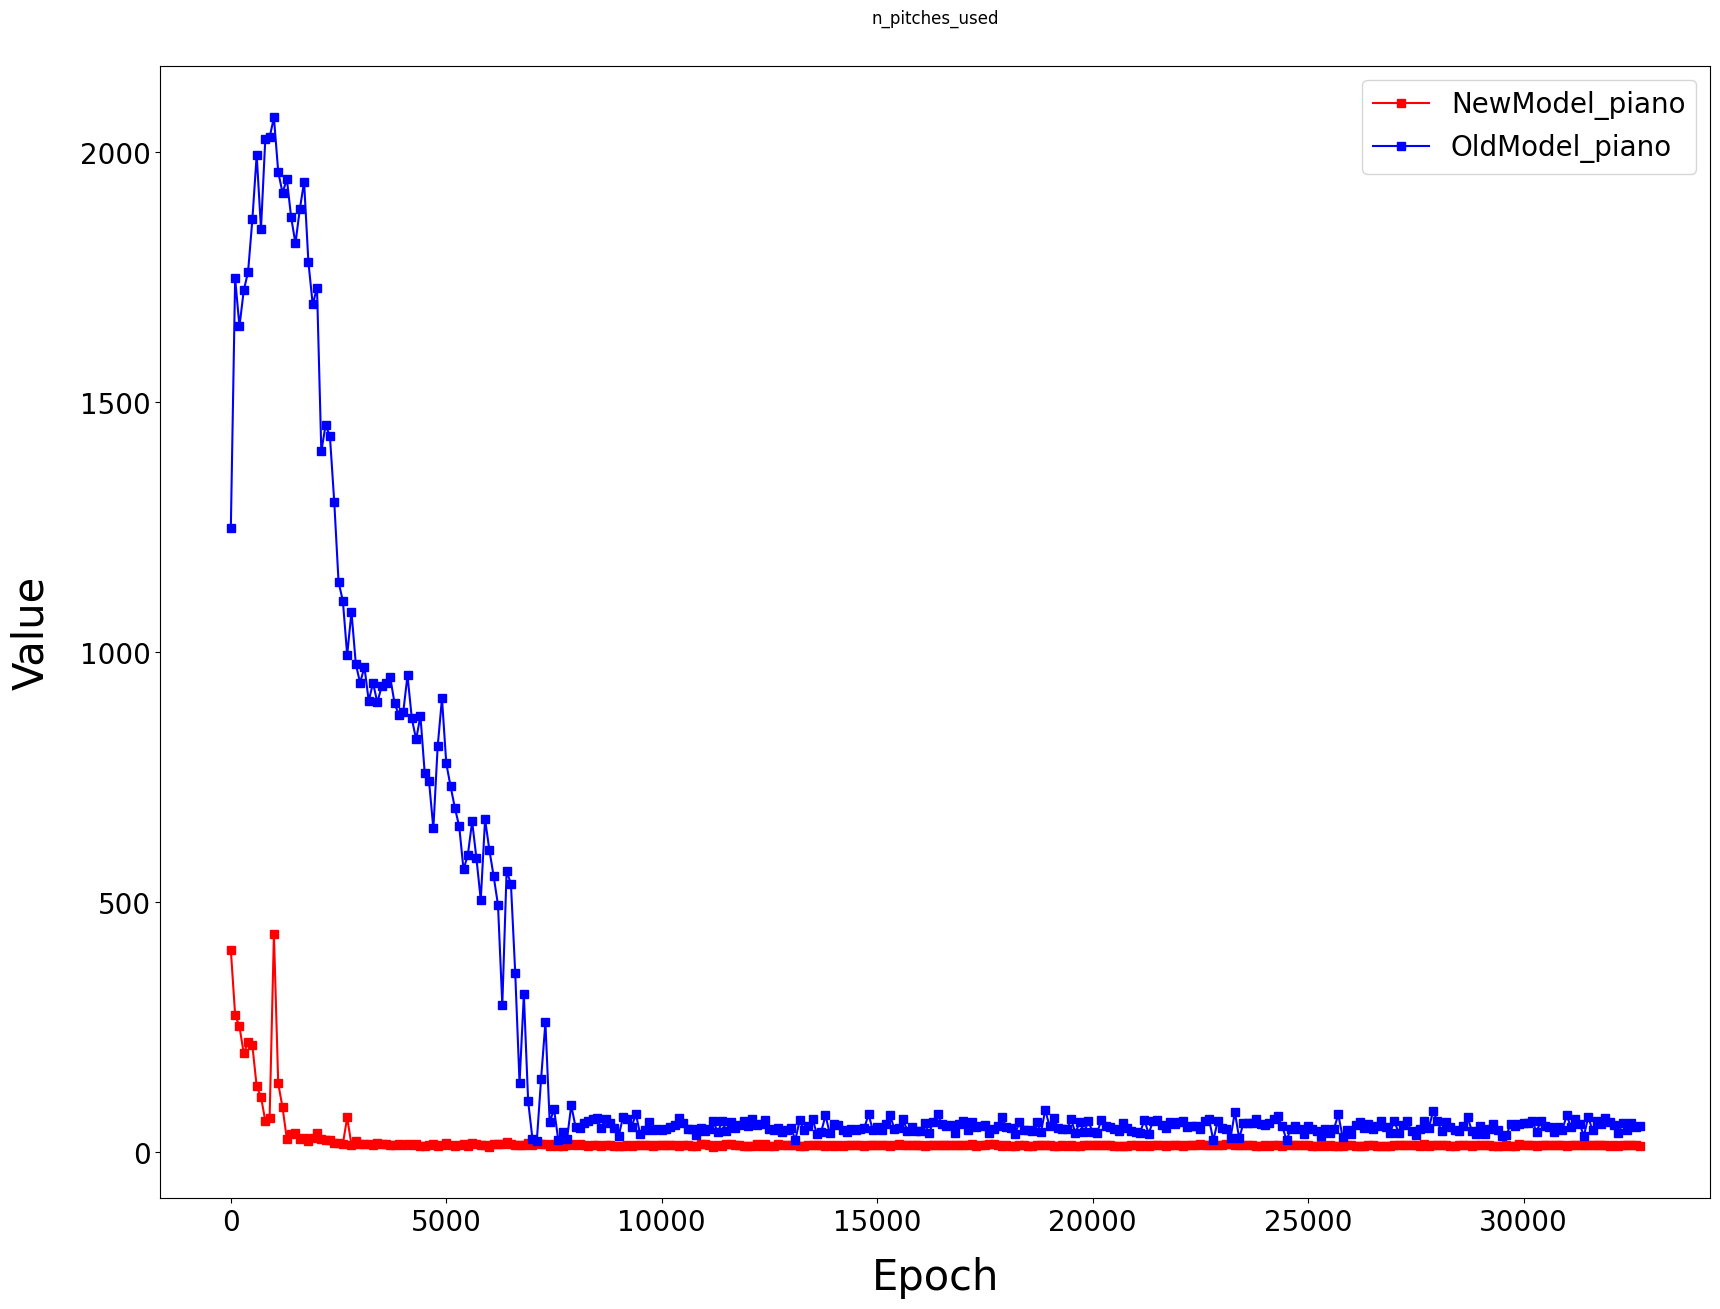

In [ ]:
import matplotlib.pyplot as plt

epoch = [x*100 for x in range(times)]

# 設定圖片大小為長20、寬15
plt.figure(figsize=(20,15),dpi=100,linewidth = 2)

# 把資料放進來並指定對應的X軸、Y軸的資料，用方形做標記(s-)，並指定線條顏色為紅色，使用label標記線條含意
plt.plot(epoch,epochValue_1,'s-',color = 'r', label="NewModel_piano")
plt.plot(epoch,old_epochValue_1,'s-',color = 'b', label="OldModel_piano")

# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離
plt.title("n_pitches_used", x=0.5, y=1.03)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# 標示x軸(labelpad代表與圖片的距離)
plt.xlabel("Epoch", fontsize=30, labelpad = 15)
# 標示y軸(labelpad代表與圖片的距離)
plt.ylabel("Value", fontsize=30, labelpad = 20)

# 顯示出線條標記位置
plt.legend(loc = "best", fontsize=20)
plt.show()

# polyphonic_rate

In [ ]:
folderPath = './eval_popRock/polyphonic_rate/'
old_FolderPath = './eval_popRock_new/polyphonic_rate/'

allFiles = gb.glob(folderPath+'*.npy')
old_allFiles = gb.glob(old_FolderPath+'*.npy')
baseName = folderPath+'polyphonic_rate_'
old_baseName = old_FolderPath+'polyphonic_rate_'
endName = '.npy'

times = len(old_allFiles) if len(allFiles)>len(old_allFiles) else len(allFiles)
newFiles = []
old_newFiles= []

# 整理排序array
for i in range (times):

  # 找出目標檔案位置
  index = allFiles.index(baseName + str(100*(i+1)) + endName)
  index_old = old_allFiles.index(old_baseName + str(100*(i+1)) + endName)

  newFiles.append(allFiles[index])
  old_newFiles.append(old_allFiles[index_old])

epochValue_1 = []
epochValue_2 = []
epochValue_3 = []
epochValue_4 = []
epochValue_5 = []

old_epochValue_1 = []
old_epochValue_2 = []
old_epochValue_3 = []
old_epochValue_4 = []
old_epochValue_5 = []

value_count = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
oldValue_count = np.array([0.0, 0.0, 0.0, 0.0, 0.0])

# 讀取每個epoch的值
for i in range(times) :
  value = np.load(newFiles[i])
  old_value = np.load(old_newFiles[i])
  epochValue_1.append(value[0])
  epochValue_2.append(value[1])
  epochValue_3.append(value[2])
  epochValue_4.append(value[3])
  epochValue_5.append(value[4])

  old_epochValue_1.append(old_value[0])
  old_epochValue_2.append(old_value[1])
  old_epochValue_3.append(old_value[2])
  old_epochValue_4.append(old_value[3])
  old_epochValue_5.append(old_value[4])

  # 計算總共的值
  value_count = np.add(value_count, value)
  oldValue_count = np.add(oldValue_count, old_value)

new_mean = np.divide(value_count,times)
old_mean = np.divide(oldValue_count,times)
print('舊Model平均值 : ',new_mean)
print('新Model平均值 : ',old_mean)
diff = np.divide(old_mean,new_mean)
persent_diff =np.subtract(np.multiply(diff,100),100)
print('Model間差異為 : ',persent_diff)

舊Model平均值 :  [0.04794113 0.47801717 0.34849089 0.02915843 0.43239562]
新Model平均值 :  [0.15276008 0.44384121 0.3196163  0.18538461 0.38209844]
Model間差異為 :  [218.64096261  -7.14952682  -8.28560851 535.78393833 -11.63221451]


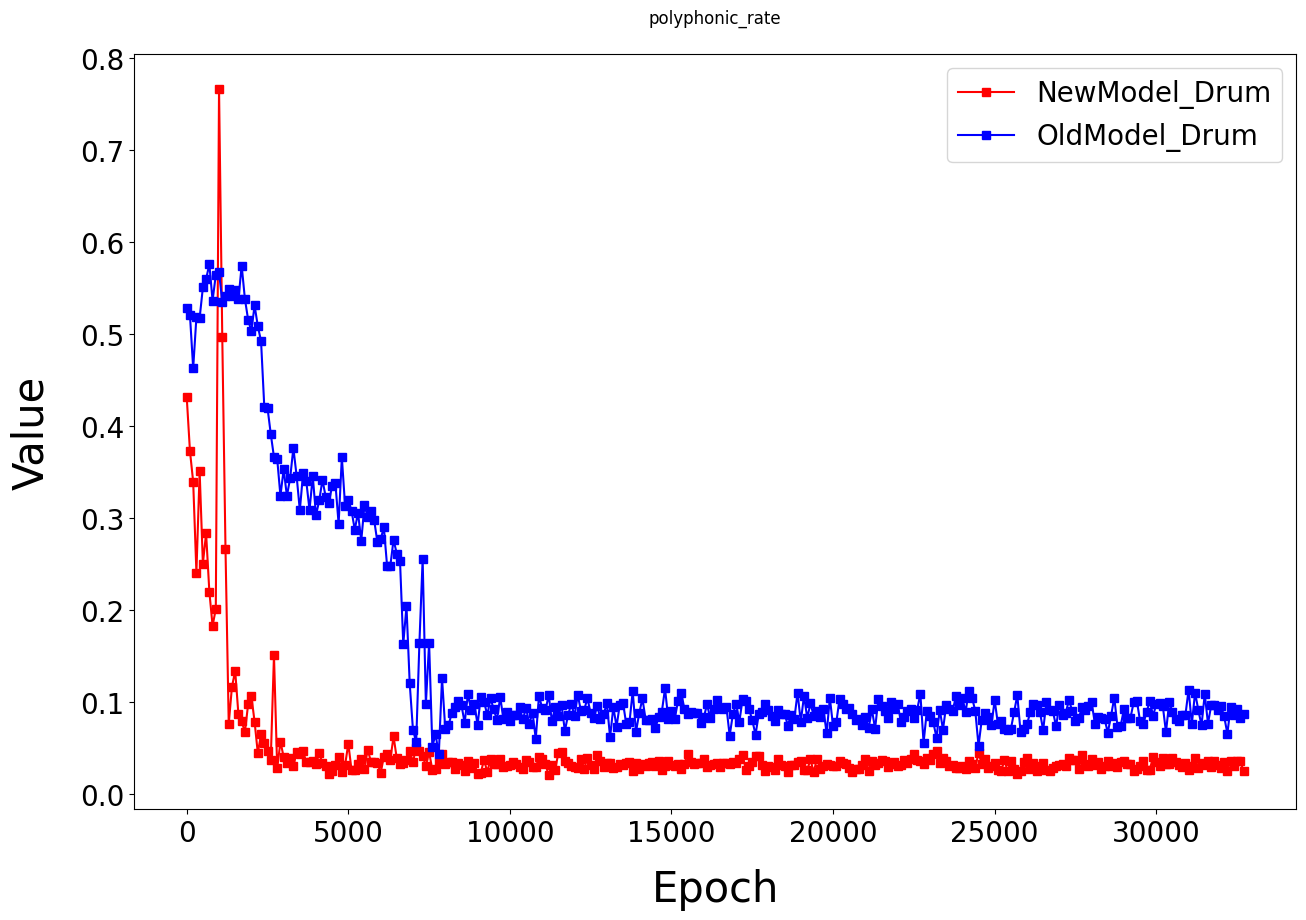

In [ ]:
import matplotlib.pyplot as plt

epoch = [x*100 for x in range(times)]

# 設定圖片大小為長20、寬15
plt.figure(figsize=(15,10),dpi=100,linewidth = 2)

# 把資料放進來並指定對應的X軸、Y軸的資料，用方形做標記(s-)，並指定線條顏色為紅色，使用label標記線條含意
plt.plot(epoch,epochValue_1,'s-',color = 'r', label="NewModel_Drum")
plt.plot(epoch,old_epochValue_1,'s-',color = 'b', label="OldModel_Drum")

# 設定圖片標題，以及指定字型設定，x代表與圖案最左側的距離，y代表與圖片的距離
plt.title("polyphonic_rate", x=0.5, y=1.03)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# 標示x軸(labelpad代表與圖片的距離)
plt.xlabel("Epoch", fontsize=30, labelpad = 15)
# 標示y軸(labelpad代表與圖片的距離)
plt.ylabel("Value", fontsize=30, labelpad = 20)

# 顯示出線條標記位置
plt.legend(loc = "best", fontsize=20)
plt.show()